# **Forest Fire Detection Using Convolutional Neural Network Part 3**

---



In this notebook let's see how we can improve the classifier built in Part 1 using Transfer Learning. 


This is part 3, in part 4 we'll see how and what errors occured in the successful execution of this project.

Part 1 : https://www.linkedin.com/posts/mayureshmadiwale_forestfire-activity-6951585315375448064-RS_V?utm_source=linkedin_share&utm_medium=member_desktop_web


Part 2 : https://www.linkedin.com/pulse/forest-fire-detection-using-cnn-part-2-mayuresh-madiwale

link to dataset: https://www.kaggle.com/datasets/brsdincer/wildfire-detection-image-data

### Importing necessary libraries

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

### Making saperate datasets for training and testing

In [2]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/content/drive/MyDrive/forest_fire/Training and Validation/",
                                          target_size=(224,224),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("/content/drive/MyDrive/forest_fire/Testing/",
                                          target_size=(224,224),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 1410 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [3]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

### Model Building

### Model Name :- tf2-preview/mobilenet_v2/feature_vector 

In [4]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [5]:
model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(1,activation='sigmoid' )
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


### Compiling the model

In [6]:
model.compile(
  optimizer="adam",
  loss='binary_crossentropy',metrics=['accuracy'])

### Fitting the model

In [7]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
r = model.fit(train_dataset, epochs=10, validation_data = test_dataset, callbacks=[callback] )

Epoch 1/10
45/45 [==============================] - 178s 4s/step - loss: 0.2164 - accuracy: 0.9518 - val_loss: 0.1082 - val_accuracy: 1.0000
Epoch 2/10
45/45 [==============================] - 41s 906ms/step - loss: 0.0584 - accuracy: 0.9922 - val_loss: 0.0675 - val_accuracy: 1.0000
Epoch 3/10
45/45 [==============================] - 40s 888ms/step - loss: 0.0395 - accuracy: 0.9957 - val_loss: 0.0514 - val_accuracy: 1.0000
Epoch 4/10
45/45 [==============================] - 40s 896ms/step - loss: 0.0304 - accuracy: 0.9965 - val_loss: 0.0400 - val_accuracy: 1.0000
Epoch 5/10
45/45 [==============================] - 41s 901ms/step - loss: 0.0252 - accuracy: 0.9972 - val_loss: 0.0357 - val_accuracy: 1.0000
Epoch 6/10
45/45 [==============================] - 40s 892ms/step - loss: 0.0208 - accuracy: 0.9972 - val_loss: 0.0283 - val_accuracy: 1.0000
Epoch 7/10
45/45 [==============================] - 42s 937ms/step - loss: 0.0182 - accuracy: 0.9972 - val_loss: 0.0306 - val_accuracy: 1.0000
E

### Predicting on Test Dataset

In [8]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

### Plotting loss per iteration

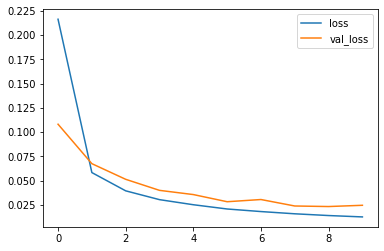

In [11]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

### Plotting accuracy per iteration

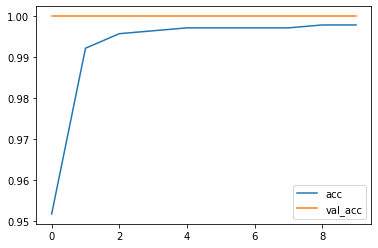

In [12]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

### Making a function to see any image from dataset with predicted label

In [13]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(224,224))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    val = np.round(val)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

[[0.]]


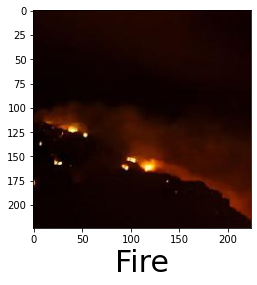

In [14]:
predictImage("/content/drive/MyDrive/forest_fire/Testing/fire/abc172.jpg")

[[0.]]


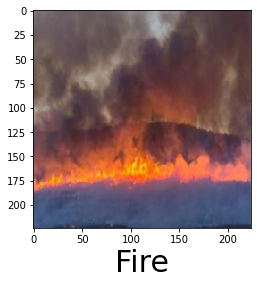

In [15]:
predictImage('/content/drive/MyDrive/forest_fire/Testing/fire/abc178.jpg')

[[0.]]


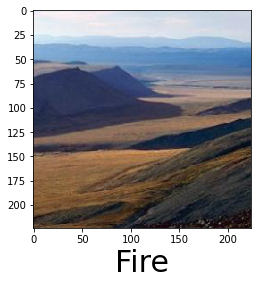

In [16]:
predictImage('/content/drive/MyDrive/forest_fire/Testing/nofire/abc347.jpg')

[[1.]]


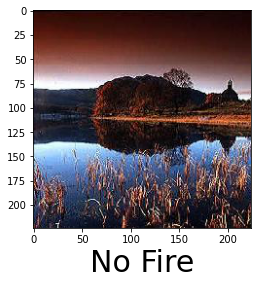

In [17]:
predictImage('/content/drive/MyDrive/forest_fire/Testing/nofire/abc367.jpg')

[[0.]]


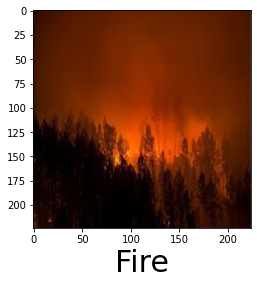

In [18]:
predictImage('/content/drive/MyDrive/forest_fire/Training and Validation/fire/abc012.jpg')

[[0.]]


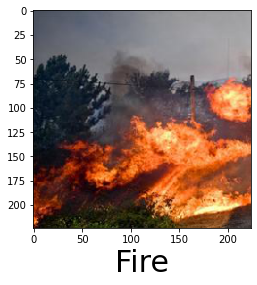

In [19]:
predictImage('/content/drive/MyDrive/forest_fire/Training and Validation/fire/abc051.jpg')

[[0.]]


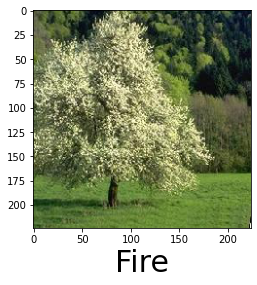

In [20]:
predictImage('/content/drive/MyDrive/forest_fire/Training and Validation/nofire/abc218.jpg')

### predicting images from google

[[0.]]


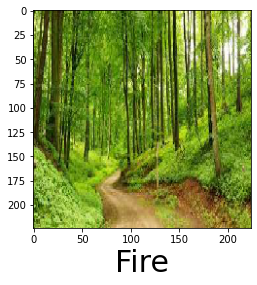

In [21]:
predictImage('/content/drive/MyDrive/download.jfif')

[[0.]]


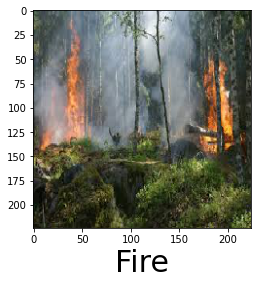

In [22]:
predictImage('/content/drive/MyDrive/images (1).jfif')

[[0.]]


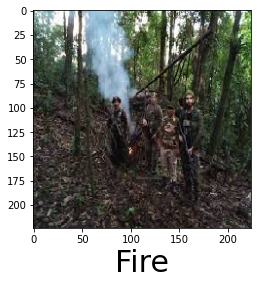

In [23]:
predictImage('/content/drive/MyDrive/images.jfif')

# Model1 did not perform well in testing even though the accuracy is great. Let's try a different model.

### Model Name : - imagenet/efficientnet_v2_imagenet21k_ft1k_b0/classification

In [24]:
feature_extractor_model2 = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/classification/2"

pretrained_model_without_top = hub.KerasLayer(
    feature_extractor_model2, input_shape=(224, 224, 3), trainable=False)

In [25]:
model2 = tf.keras.Sequential([
  pretrained_model_without_top,
  tf.keras.layers.Dense(1,activation='sigmoid' )
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1000)              7200312   
                                                                 
 dense_1 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 7,201,313
Trainable params: 1,001
Non-trainable params: 7,200,312
_________________________________________________________________


### Compiling the model

In [26]:
model2.compile(
  optimizer="adam",
  loss='binary_crossentropy',metrics=['accuracy'])

### Fitting the model

In [27]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
r2 = model2.fit(train_dataset, epochs=10, validation_data = test_dataset, callbacks=[callback] )

Epoch 1/10
45/45 [==============================] - 72s 1s/step - loss: 0.2868 - accuracy: 0.8887 - val_loss: 0.0956 - val_accuracy: 0.9412
Epoch 2/10
45/45 [==============================] - 65s 1s/step - loss: 0.0415 - accuracy: 0.9915 - val_loss: 0.0654 - val_accuracy: 0.9706
Epoch 3/10
45/45 [==============================] - 64s 1s/step - loss: 0.0290 - accuracy: 0.9950 - val_loss: 0.0492 - val_accuracy: 0.9706
Epoch 4/10
45/45 [==============================] - 64s 1s/step - loss: 0.0224 - accuracy: 0.9972 - val_loss: 0.0431 - val_accuracy: 0.9853
Epoch 5/10
45/45 [==============================] - 64s 1s/step - loss: 0.0193 - accuracy: 0.9972 - val_loss: 0.0383 - val_accuracy: 0.9853
Epoch 6/10
45/45 [==============================] - 65s 1s/step - loss: 0.0146 - accuracy: 0.9979 - val_loss: 0.0351 - val_accuracy: 0.9853
Epoch 7/10
45/45 [==============================] - 65s 1s/step - loss: 0.0127 - accuracy: 0.9979 - val_loss: 0.0330 - val_accuracy: 0.9853
Epoch 8/10
45/45 [==

### Predicting the outcomes

In [28]:
predictions = model2.predict(test_dataset)
predictions = np.round(predictions)

### Loss per Iteration plot

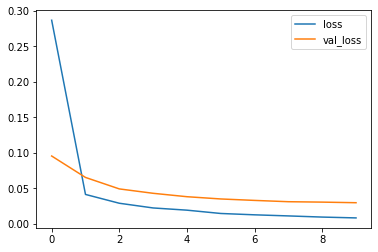

In [30]:
plt.plot(r2.history['loss'], label='loss')
plt.plot(r2.history['val_loss'], label='val_loss')
plt.legend()

### Accuracy per iteration plot

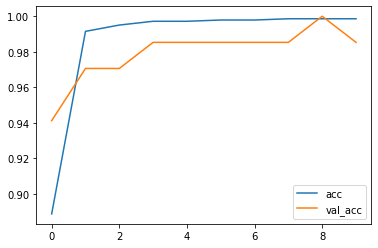

In [31]:
plt.plot(r2.history['accuracy'], label='acc')
plt.plot(r2.history['val_accuracy'], label='val_acc')
plt.legend()

### Making a function to see any image from dataset with predicted label

In [32]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(224,224))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model2.predict(X)
    val = np.round(val)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

[[0.]]


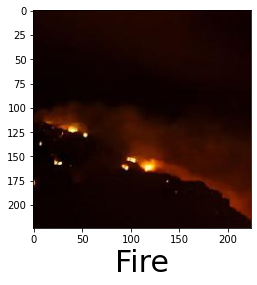

In [33]:
predictImage("/content/drive/MyDrive/forest_fire/Testing/fire/abc172.jpg")

[[1.]]


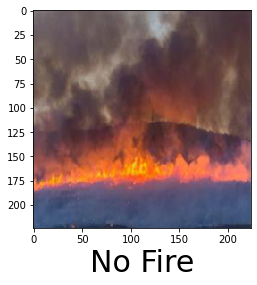

In [34]:
predictImage('/content/drive/MyDrive/forest_fire/Testing/fire/abc178.jpg')

[[0.]]


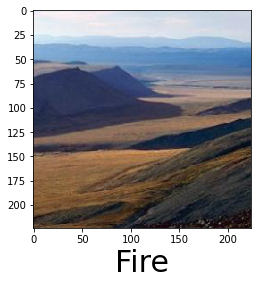

In [35]:
predictImage('/content/drive/MyDrive/forest_fire/Testing/nofire/abc347.jpg')

[[1.]]


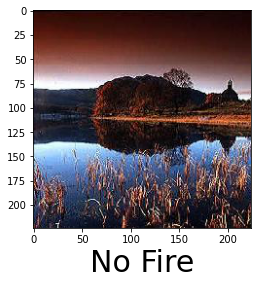

In [36]:
predictImage('/content/drive/MyDrive/forest_fire/Testing/nofire/abc367.jpg')

[[0.]]


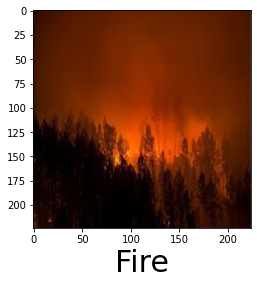

In [37]:
predictImage('/content/drive/MyDrive/forest_fire/Training and Validation/fire/abc012.jpg')

[[1.]]


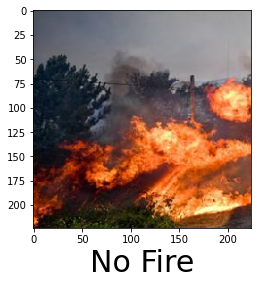

In [38]:
predictImage('/content/drive/MyDrive/forest_fire/Training and Validation/fire/abc051.jpg')

[[1.]]


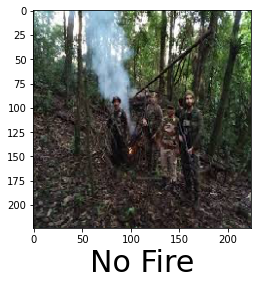

In [39]:
predictImage('/content/drive/MyDrive/images.jfif')

[[1.]]


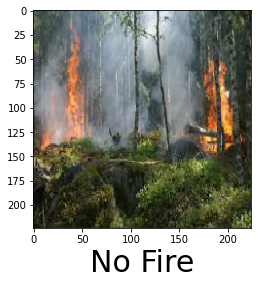

In [40]:
predictImage('/content/drive/MyDrive/images (1).jfif')

[[1.]]


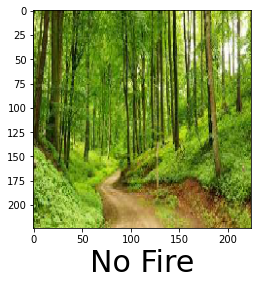

In [41]:
predictImage('/content/drive/MyDrive/download.jfif')

[[0.]]


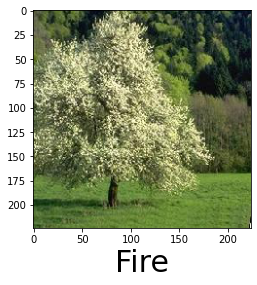

In [42]:
predictImage('/content/drive/MyDrive/forest_fire/Training and Validation/nofire/abc218.jpg')

# Model2 did not perform well in testing even though the accuracy is great. Let's try a different model.

### Model Name :- bit/m-r50x1

In [45]:
feature_extractor_model3 = "https://tfhub.dev/google/bit/m-r50x1/1"

pretrained_model_without_top3 = hub.KerasLayer(
    feature_extractor_model3, input_shape=(224, 224, 3), trainable=False)

In [46]:
model3 = tf.keras.Sequential([
  pretrained_model_without_top3,
  tf.keras.layers.Dense(1,activation='sigmoid' )
])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 2048)              23500352  
                                                                 
 dense_2 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23,502,401
Trainable params: 2,049
Non-trainable params: 23,500,352
_________________________________________________________________


### Compiling the model

In [48]:
model3.compile(
  optimizer="adam",
  loss='binary_crossentropy',metrics=['accuracy'])

### Fitting the model

In [49]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
r3 = model3.fit(train_dataset, epochs=10, validation_data = test_dataset, callbacks=[callback] )

Epoch 1/10
45/45 [==============================] - 350s 7s/step - loss: 0.1011 - accuracy: 0.9631 - val_loss: 0.0360 - val_accuracy: 0.9853
Epoch 2/10
45/45 [==============================] - 335s 7s/step - loss: 0.0146 - accuracy: 0.9950 - val_loss: 0.0581 - val_accuracy: 0.9706
Epoch 3/10
45/45 [==============================] - 339s 8s/step - loss: 0.0063 - accuracy: 0.9986 - val_loss: 0.0251 - val_accuracy: 0.9853
Epoch 4/10
45/45 [==============================] - 332s 7s/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.0170 - val_accuracy: 1.0000
Epoch 5/10
45/45 [==============================] - 333s 7s/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0227 - val_accuracy: 0.9853
Epoch 6/10
45/45 [==============================] - 334s 7s/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0441 - val_accuracy: 0.9706
Epoch 7/10
45/45 [==============================] - 332s 7s/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0438 - val_accuracy: 0.9706
Epoch 8/10
45

### Predicting on test dataset

In [50]:
predictions = model3.predict(test_dataset)
predictions = np.round(predictions)

### Loss per iteration plot

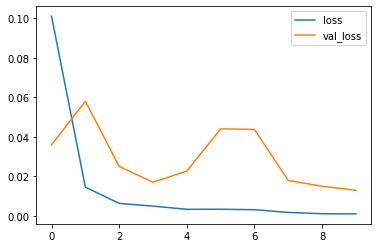

In [51]:
plt.plot(r3.history['loss'], label='loss')
plt.plot(r3.history['val_loss'], label='val_loss')
plt.legend()

### Accuracy per iteration plot

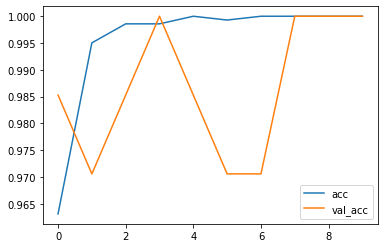

In [52]:
plt.plot(r3.history['accuracy'], label='acc')
plt.plot(r3.history['val_accuracy'], label='val_acc')
plt.legend()

### Making a function to see any image from dataset with predicted label

In [53]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(224,224))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model3.predict(X)
    val = np.round(val)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

[[1.]]


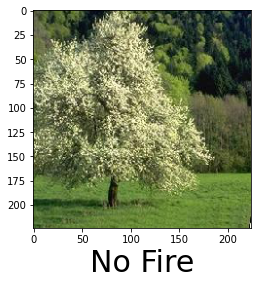

In [54]:
predictImage('/content/drive/MyDrive/forest_fire/Training and Validation/nofire/abc218.jpg')

[[1.]]


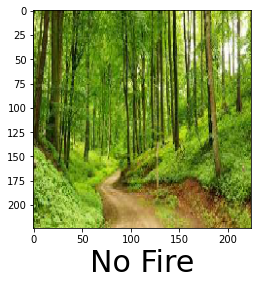

In [55]:
predictImage('/content/drive/MyDrive/download.jfif')

[[0.]]


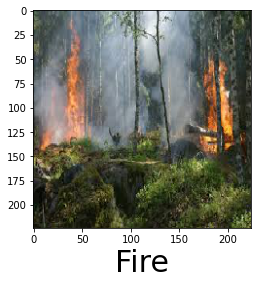

In [56]:
predictImage('/content/drive/MyDrive/images (1).jfif')

[[1.]]


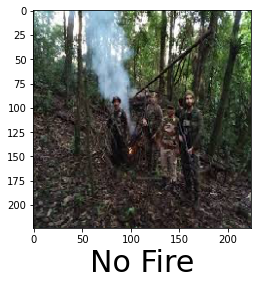

In [57]:
predictImage('/content/drive/MyDrive/images.jfif')

[[0.]]


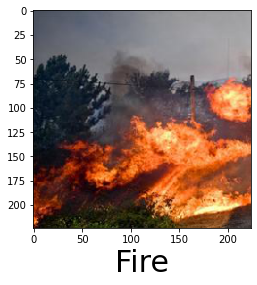

In [58]:
predictImage('/content/drive/MyDrive/forest_fire/Training and Validation/fire/abc051.jpg')

[[0.]]


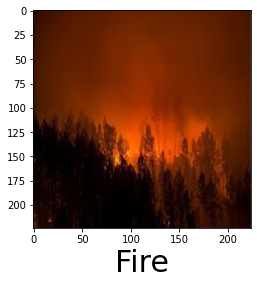

In [59]:
predictImage('/content/drive/MyDrive/forest_fire/Training and Validation/fire/abc012.jpg')

[[1.]]


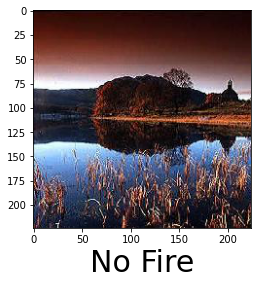

In [60]:
predictImage('/content/drive/MyDrive/forest_fire/Testing/nofire/abc367.jpg')

[[1.]]


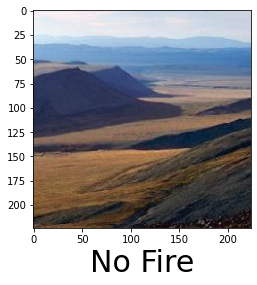

In [61]:
predictImage('/content/drive/MyDrive/forest_fire/Testing/nofire/abc347.jpg')

[[0.]]


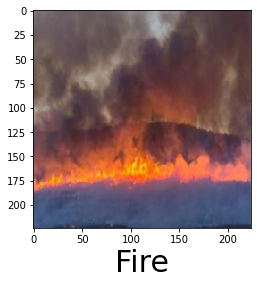

In [62]:
predictImage('/content/drive/MyDrive/forest_fire/Testing/fire/abc178.jpg')

[[0.]]


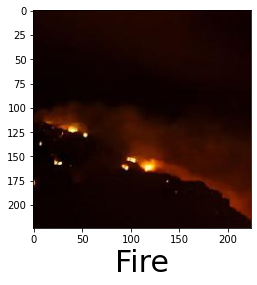

In [63]:
predictImage("/content/drive/MyDrive/forest_fire/Testing/fire/abc172.jpg")

[[0.]]


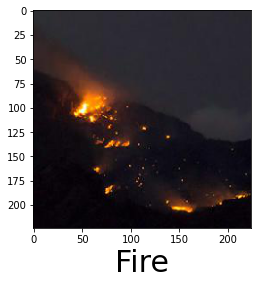

In [64]:
predictImage("/content/drive/MyDrive/forest_fire/Testing/fire/abc186.jpg")

[[1.]]


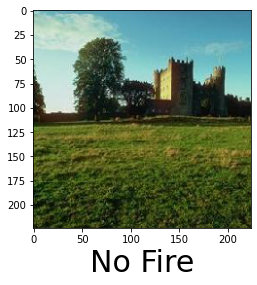

In [65]:
predictImage("/content/drive/MyDrive/forest_fire/Testing/nofire/abc353.jpg")

[[0.]]


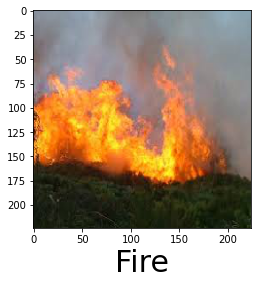

In [66]:
predictImage("/content/drive/MyDrive/images (2).jfif")



-----



# Model3 did perform well in testing and the accuracy is great.

# Final Thoughts



1.   Model3 is performing best in testing.
2.   Third model bit/m-r50x1 from Tensorflow Hub is published by google and is best performing in the given task.
3.   bit/m-r50x1 uses ResNet50-v2 architecture.
4.   Tansfer Learning has cut down the training time significantly. 
5.   Model does take some time in fitting but it can be reduced by use of TPU available in Google Colab. 
6.   Part 4 is on it's way where I will share the theory behind this project.